# Simple Linear Regression

# Delivery_Time Dataset

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
# Load Dataset
delivery =pd.read_csv("/Users/Admin/Documents/data science assignment/simple linear regression/delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Data Cleaning

In [3]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
delivery.shape

(21, 2)

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#check for missing values
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
#rename dataset
delivery = delivery.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [8]:
# kurtosis value
print(kurtosis(delivery.DT))
print(kurtosis(delivery.ST))

-0.02558576894549036
-1.1653901357029155


In [9]:
# skewness value
print(skew(delivery.DT))
print(skew(delivery.ST))

0.326702631656106
0.043680994983108075


# Data Visualization

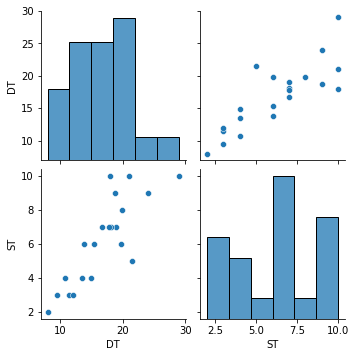

In [10]:
# Seaborn visualization library
import seaborn as sns
sns.pairplot(delivery) 

#### This data is positive correlation : DT~ST is more positive correlation 

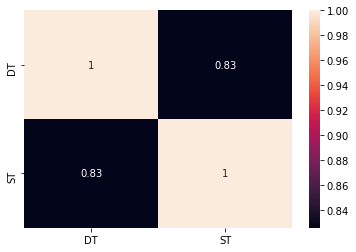

In [11]:
# correlation matrix plot
import matplotlib.pyplot as plt
corrMatrix = delivery.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### The value of correlation for DT~ST is 0.83 it's near to +1. So it is positive correlation.

# Box Plot

<AxesSubplot:>

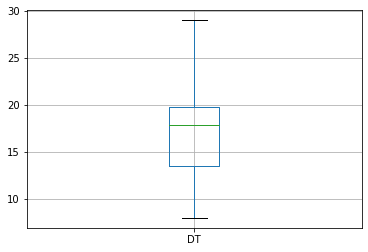

In [12]:
#Box plot for DT
delivery.boxplot(column=['DT'])

#### There is no outliers for DT and it is Negative Skew Box plot

<AxesSubplot:>

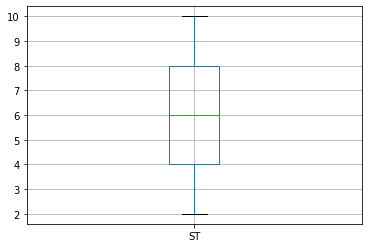

In [13]:
#Box plot for ST
delivery.boxplot(column=['ST'])

#### There is no outliers for ST and it is normal Distribution Box plot

# Histogram

<AxesSubplot:>

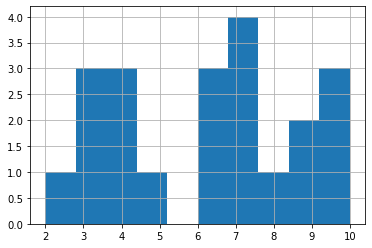

In [14]:
# histogram of  ST
delivery['ST'].hist()

# Bar Plot

<AxesSubplot:>

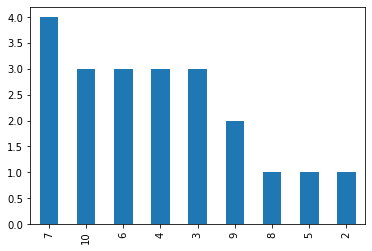

In [15]:
#Bar plot for ST 
delivery['ST'].value_counts().plot.bar()

# Dist Plot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

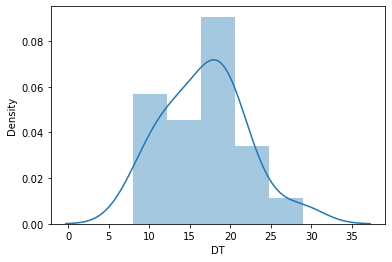

In [16]:
# disp plot for DT
import seaborn as sns
sns.distplot(delivery['DT'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

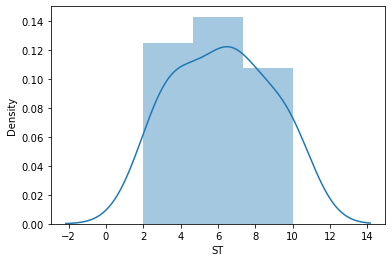

In [17]:
# disp plot for ST
import seaborn as sns
sns.distplot(delivery['ST'])

# Build a model for Delivery_Time dataset

In [18]:
#Correlation
delivery.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [19]:
# Ordinary Least Squares(OLS) 
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = delivery).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

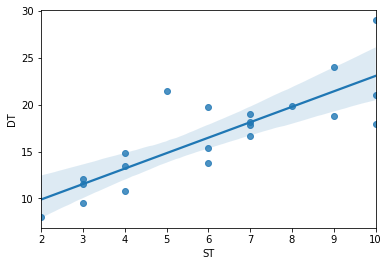

In [20]:
# Regression plot
sns.regplot(x="ST", y="DT", data=delivery)

In [21]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


#### P-value of  ST is significant because it's is less than 0.05.

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#### R-Square value is 68% . which is not good output. So do the ols again to get better output.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.98e-06
Time:                        10:48:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


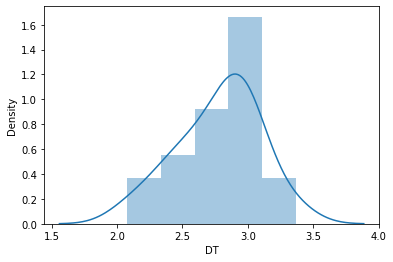

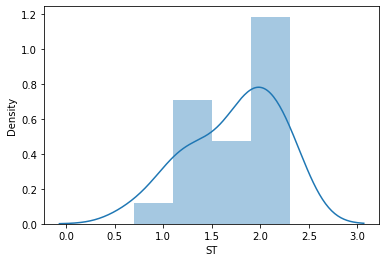

<Figure size 432x288 with 0 Axes>

In [25]:
# Distplot for both DT and ST

data_1=delivery
data_1['DT'] = np.log(data_1['DT'])
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

# Model_2 

In [26]:
model_2 = smf.ols("DT~np.log(ST)",data=delivery).fit()

In [27]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     65.22
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.46e-07
Time:                        10:48:30   Log-Likelihood:                 10.395
No. Observations:                  21   AIC:                            -16.79
Df Residuals:                      19   BIC:                            -14.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3303      0.065     36.068      0.000       2.195       2.466
np.log(ST)     0.8812      0.109      8.076      0.000       0.653       1.110
==============================================================================
Omnibus:                        1.008   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.666
Skew:                           0.423   Prob(JB):                        0.717
Kurtosis:                       2.789   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Hence the P-value is less than 0.05. So X(log(ST)) varibale is significance and also  R-Square value is 0.77 That’s mean this model will predict the output 77% time correct. So we need still better model so do again ols.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


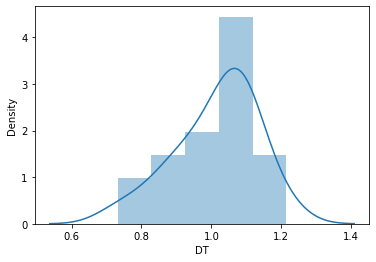

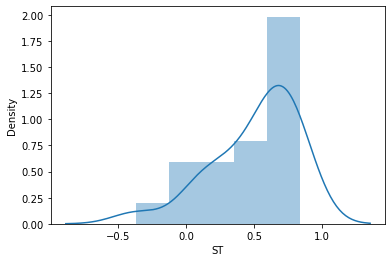

<Figure size 432x288 with 0 Axes>

In [28]:
# Distplot for both DT abd ST

data_2=delivery
data_1['DT'] = np.log(data_1['DT'])
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

# Model_3

In [29]:
model_3 = smf.ols("np.log(DT)~ST",data=delivery).fit()

In [30]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.53
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.39e-08
Time:                        10:48:55   Log-Likelihood:                 32.742
No. Observations:                  21   AIC:                            -61.48
Df Residuals:                      19   BIC:                            -59.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1718      0.022     -7.708      0.000      -0.218      -0.125
ST             0.3542      0.038      9.409      0.000       0.275       0.433
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.282
Skew:                           0.221   Prob(JB):                        0.868
Kurtosis:                       2.644   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Hence the P-value is less than 0.05. So X(ST) varibale is significance and also  R-Square value is 0.82 That’s mean this model will predict the output 82% time correct.

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


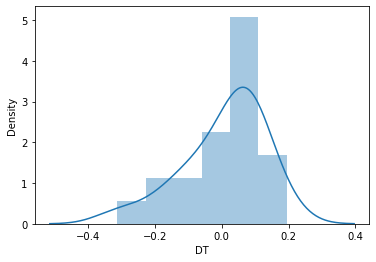

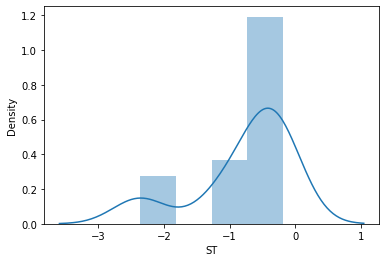

<Figure size 432x288 with 0 Axes>

In [31]:
# Distplot for both DT abd ST

data_3=delivery
data_1['DT'] = np.log(data_1['DT'])
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

#### R-Squared value of the given Delivery_time_dataset model3 output is obtained as 82%. which means it's good model.

# Predict for new data point

In [32]:
#New data for prediction
new_data=pd.DataFrame({"ST":1},index=[1])

In [33]:
model.predict(new_data)

1    8.231754
dtype: float64

#### The new Predicted value for delivery_time_dataset is given input as Sorting Time = 1 and the ouput is obtained as Delivery Time = 8.23sec.

#### First step in simple linear regression is importing the required libraries and then  load the dataset and then do data Cleaning and then Data Visulazation for the given Dataset. Next step is Build a ols model_1 for the Delivery_Time dataset by DT as output and ST as input and then do Regression for that model and find P-Value and R-Squared value where for Model_1 P-value of ST is significant because it's is less than 0.05. And R-Squared is 68% which is not good value. So do again ols model. Now for ols model_2 give output as DT and input as log(ST) and do again same process which is done for model_1 where for Model_2 P-value is less than 0.05. So X(ST) varibale is significance and also R-Square value is 0.77 That’s mean this model will predict the output 77% time correct. So we need still better model so do again ols. ols for Model_3 give output as log(DT) and input as ST and repeat the step again as model_2. Pvalue is again less than 0.05 for ST which is significant. R-Squared value of the given Delivery_time_dataset model_3 output is obtained as 82%. which means it's good model. After do that Test the model by giving random value and Predicted the model. This are the steps for Simple Linear Regression.  